# Time Series

By Vivian Zeng

U of Notre Dame

In [2]:
import pandas as pd

In [3]:
%matplotlib inline

seattle = pd.read_csv("seattle_weather_2012-2015.csv", 
                      parse_dates = ['date'],
                      index_col = 'date')
seattle.head()

,precipitation,wind,weather,max_temp,min_temp
date,,,,,
2012-01-01,0.0,4.7,drizzle,55.0,41.0
2012-01-02,10.9,4.5,rain,51.1,37.0
2012-01-03,0.8,2.3,rain,53.1,45.0
2012-01-04,20.3,4.7,rain,54.0,42.1
2012-01-05,1.3,6.1,rain,48.0,37.0


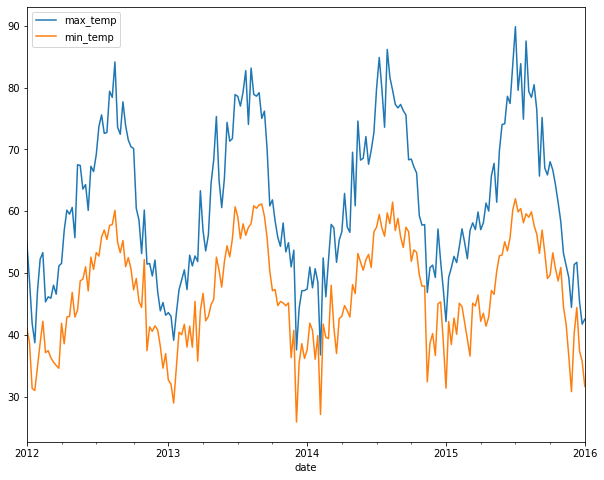

In [4]:
# Average weekly high and low temperature
seattle.resample('W').agg({'max_temp':'mean', 
                           'min_temp':'mean'}).plot(figsize = (10,8))

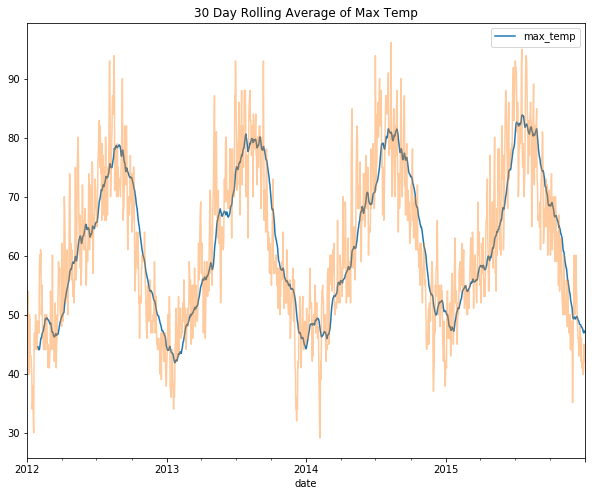

In [5]:
# 30 day rolling window
# Notice how much smoother the trend is

ax = (
seattle
    .rolling(window = 30)
    .agg({'max_temp':'mean'})
    .plot(figsize = (10, 8),
          title = '30 Day Rolling Average of Max Temp')
)
seattle['max_temp'].plot(ax = ax, alpha = 0.4)

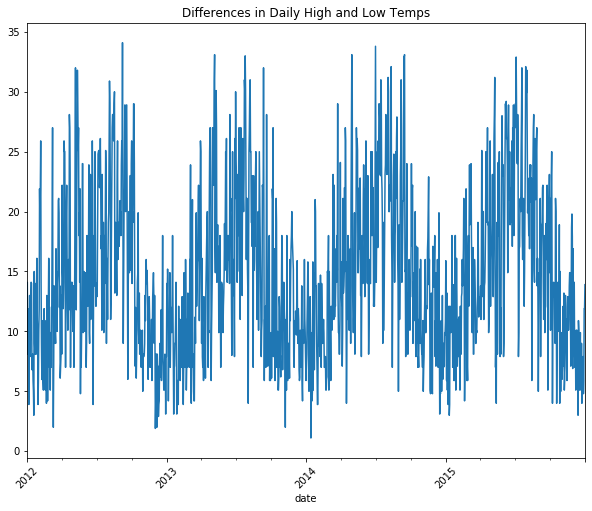

In [6]:
# Investigate difference in high and low daily temperature
seattle['temp_diffs'] = seattle['max_temp'] - seattle['min_temp']
seattle['temp_diffs'].plot(figsize = (10, 8),
                           rot = 45,
                           title = 'Differences in Daily High and Low Temps')

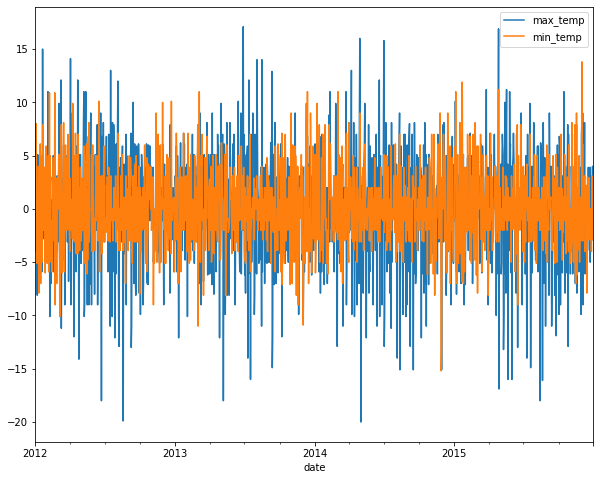

In [7]:
# Plot the day-to-day differences in temperature
seattle[['max_temp', 'min_temp']].diff().plot(figsize = (10,8))

In [8]:
# Create a copy of the seattle data
seattle_ts = seattle.copy()

In [9]:
# Reset the index to bring date in as column
seattle_ts.reset_index(inplace = True)
seattle_ts.head()

,date,precipitation,wind,weather,max_temp,min_temp,temp_diffs
0,2012-01-01,0.0,4.7,drizzle,55.0,41.0,14.0
1,2012-01-02,10.9,4.5,rain,51.1,37.0,14.1
2,2012-01-03,0.8,2.3,rain,53.1,45.0,8.1
3,2012-01-04,20.3,4.7,rain,54.0,42.1,11.9
4,2012-01-05,1.3,6.1,rain,48.0,37.0,11.0


In [10]:
# Extract only the variables of interest
seattle_ts = seattle_ts[['date', 'max_temp']]
seattle_ts.head()

,date,max_temp
0,2012-01-01,55.0
1,2012-01-02,51.1
2,2012-01-03,53.1
3,2012-01-04,54.0
4,2012-01-05,48.0


In [11]:
# Rename the columns as necessary
seattle_ts.rename({'date': 'ds', 'max_temp':'y'}, 
                  axis = 'columns', 
                  inplace = True)
seattle_ts.head()

,ds,y
0,2012-01-01,55.0
1,2012-01-02,51.1
2,2012-01-03,53.1
3,2012-01-04,54.0
4,2012-01-05,48.0


In [12]:
#pip install plotly

In [13]:
# Import Prophet
from fbprophet import Prophet
import plotly

# Create a new Prophet object
model = Prophet()
print(model)

# Fit the model to the historical data
model.fit(seattle_ts)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
# Create DataFrame with future dates to predict at
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
1821,2016-12-26
1822,2016-12-27
1823,2016-12-28
1824,2016-12-29
1825,2016-12-30


In [15]:
# Make predictions for next year
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,58.650915,35.563014,50.655048,58.650915,58.650915,-15.763320,-15.763320,-15.763320,0.158571,0.158571,0.158571,-15.921891,-15.921891,-15.921891,0.0,0.0,0.0,42.887595
1,2012-01-02,58.655062,35.552077,50.832891,58.655062,58.655062,-15.175752,-15.175752,-15.175752,0.743757,0.743757,0.743757,-15.919508,-15.919508,-15.919508,0.0,0.0,0.0,43.479310
2,2012-01-03,58.659208,35.135140,50.362081,58.659208,58.659208,-16.035212,-16.035212,-16.035212,-0.122741,-0.122741,-0.122741,-15.912472,-15.912472,-15.912472,0.0,0.0,0.0,42.623996
3,2012-01-04,58.663355,34.163864,49.783248,58.663355,58.663355,-16.435735,-16.435735,-16.435735,-0.534699,-0.534699,-0.534699,-15.901036,-15.901036,-15.901036,0.0,0.0,0.0,42.227620
4,2012-01-05,58.667502,34.766912,50.801101,58.667502,58.667502,-16.046800,-16.046800,-16.046800,-0.161503,-0.161503,-0.161503,-15.885296,-15.885296,-15.885296,0.0,0.0,0.0,42.620702


ds - the timestamps

yhat - the predictions

yhat_lower - the lower bound of the prediction interval

yhat_upper - the upper bound of the prediction interval

In [16]:
# Extract the desired components
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1821,2016-12-26,43.021169,34.998471,50.765375
1822,2016-12-27,42.114435,34.059278,49.559955
1823,2016-12-28,41.670026,33.743591,49.409534
1824,2016-12-29,42.017836,34.319246,49.602322
1825,2016-12-30,41.896761,34.401098,49.207520


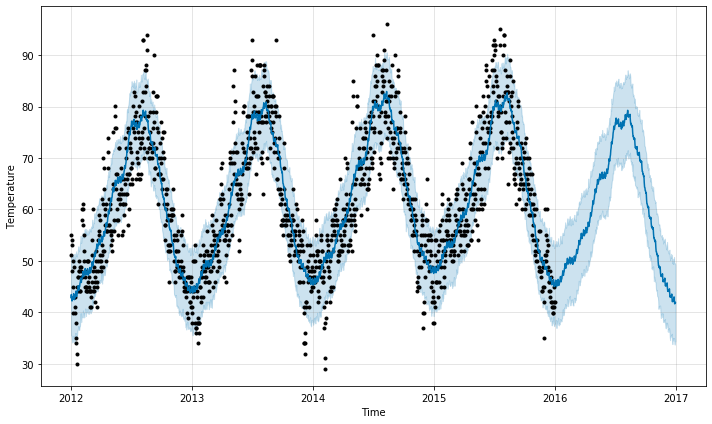

In [17]:
# Plot the model fit and predictions
forecast_plot = model.plot(forecast, 
                           xlabel = 'Time', 
                           ylabel = 'Temperature')

In [18]:
forecast['weekday_name'] = forecast['ds'].dt.day_name()
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,weekday_name
0,2012-01-01,58.650915,35.563014,50.655048,58.650915,58.650915,-15.763320,-15.763320,-15.763320,0.158571,0.158571,0.158571,-15.921891,-15.921891,-15.921891,0.0,0.0,0.0,42.887595,Sunday
1,2012-01-02,58.655062,35.552077,50.832891,58.655062,58.655062,-15.175752,-15.175752,-15.175752,0.743757,0.743757,0.743757,-15.919508,-15.919508,-15.919508,0.0,0.0,0.0,43.479310,Monday
2,2012-01-03,58.659208,35.135140,50.362081,58.659208,58.659208,-16.035212,-16.035212,-16.035212,-0.122741,-0.122741,-0.122741,-15.912472,-15.912472,-15.912472,0.0,0.0,0.0,42.623996,Tuesday
3,2012-01-04,58.663355,34.163864,49.783248,58.663355,58.663355,-16.435735,-16.435735,-16.435735,-0.534699,-0.534699,-0.534699,-15.901036,-15.901036,-15.901036,0.0,0.0,0.0,42.227620,Wednesday
4,2012-01-05,58.667502,34.766912,50.801101,58.667502,58.667502,-16.046800,-16.046800,-16.046800,-0.161503,-0.161503,-0.161503,-15.885296,-15.885296,-15.885296,0.0,0.0,0.0,42.620702,Thursday


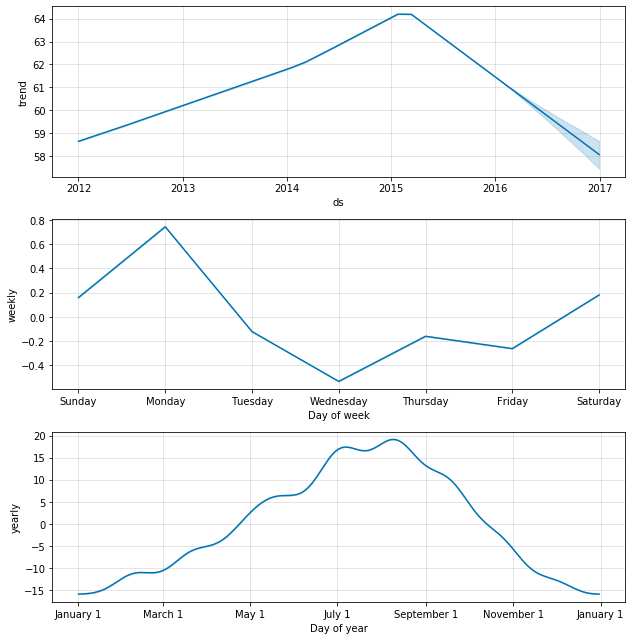

In [19]:
# Decompose the time-series into Seasonal and Non-Seasonal components
components_plot = model.plot_components(forecast)

In [20]:
#pip install --upgrade pandas==0.25.3

In [22]:
import fbprophet
print(fbprophet.__version__)

0.5
